In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import NLTKWordTokenizer
import numpy as np
import nltk

In [15]:
data = pd.read_json('new_train.json')
data.columns = ["id", "text", "author"]
data.head()

,id,text,author
0,id10914,"It will have been, by that time, totally destr...",EAP
1,id03295,"Make me happy, and I shall again be virtuous.""",MWS
2,id04103,"The margin of the river, and of the many dazzl...",EAP
3,id26189,The heat became all at once intolerable.,EAP
4,id07955,"What, indeed, was my passion for the young gir...",EAP


<Axes: title={'center': 'Relative Frequency of Words'}, xlabel='token', ylabel='relative frequency'>

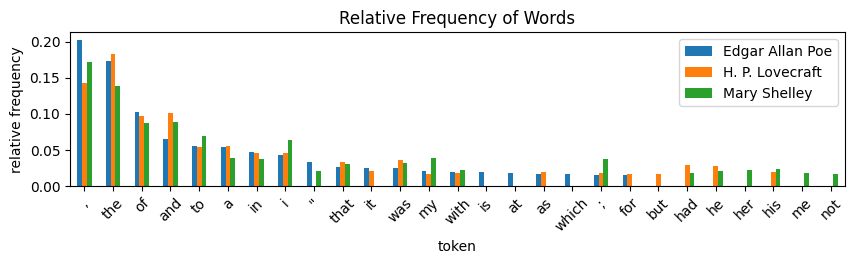

In [76]:
from nltk import FreqDist
from nltk import word_tokenize

def to_words(x):
    doc = ' '.join(list(x)).lower()
    return [doc[start:end] for start, end in NLTKWordTokenizer().span_tokenize(doc)]

df = pd.DataFrame()
per_author = data.groupby('author').agg(
    text = pd.NamedAgg("text", aggfunc=lambda x: FreqDist(to_words(x)).most_common(20)))
per_author = per_author.explode("text")
per_author["freq"] = per_author["text"].apply(lambda x: x[1])
per_author["text"] = per_author["text"].apply(lambda x: x[0])
per_author = per_author.reset_index()
per_author = per_author.pivot_table(index="text", values="freq", columns="author").reset_index()
per_author = per_author.sort_values("EAP", ascending=False)
per_author = per_author.rename(columns={"MWS": "Mary Shelley",
                      "HPL": "H. P. Lovecraft", "EAP": "Edgar Allan Poe"})
per_author.rename_axis('', inplace=True, axis=1)
per_author
per_author.iloc[:, 1:] = per_author.iloc[:, 1:].apply(lambda x: x / x.sum())
per_author.plot.bar("text", figsize=(10, 2), rot=45, ylabel="relative frequency", xlabel="token", title="Relative Frequency of Words")
# stop words and punctuation expectately dominate
# Numbers and proper names seem to be rare enough to not pose noteworthy problem

In [8]:
for doc in per_author:
    text = map(lambda x: x.lower(), [doc[start:end] for start, end in NLTKWordTokenizer().span_tokenize(doc)])
    dist = FreqDist(filter(lambda x: not x.isascii(), text)).most_common(100)
    display(dist)

# non ascii elements are used so rarely that we expect them to get eliminated by a high pass filter

[('rogêt', 14),
 ('scarabæus', 10),
 ('barrière', 9),
 ('ström', 8),
 ('à', 6),
 ('rogêt.', 5),
 ('antennæ', 4),
 ('pavée', 4),
 ('drômes', 4),
 ('scarabæus.', 3),
 ('tête', 3),
 ('andrée', 3),
 ('château', 3),
 ('drômes.', 2),
 ('ström.', 2),
 ('nebulæ', 2),
 ("'sacré", 2),
 ('théâtre', 2),
 ('variétés.', 2),
 ('æronaut', 2),
 ('ménageais', 1),
 ('chaussée', 1),
 ('petitmaître', 1),
 ('amèrement', 1),
 ('fricassée', 1),
 ('rôle', 1),
 ('crébillon', 1),
 ('ærial', 1),
 ('santé.', 1),
 ('markbrünnen', 1),
 ('grâve', 1),
 ('præter', 1),
 ('præternatural.', 1),
 ('abbé', 1),
 ('antennæ.', 1),
 ('æschylus', 1),
 ('isæus', 1),
 ('recherché', 1),
 ('ærostation.', 1),
 ('élite', 1),
 ('pensé', 1),
 ('maelström.', 1),
 ('scarabæi', 1),
 ('bête', 1),
 ('rèduit', 1),
 ('céder', 1),
 ('émeutes', 1),
 ('æronauts', 1),
 ('recherchés.', 1),
 ('préparées', 1),
 ('père', 1),
 ('voilà', 1),
 ('soirée', 1),
 ('prævalent', 1),
 ('tunéd', 1),
 ('tête.', 1),
 ('palæ', 1),
 ('même', 1),
 ("'musée", 1),
 ("d

[('celephaïs', 6),
 ('muñoz', 5),
 ('müller', 4),
 ('olathoë', 3),
 ('æmilianus', 2),
 ('bêtenoir', 2),
 ('aëroplane', 2),
 ('ædile', 2),
 ('tyché', 2),
 ('tyché.', 1),
 ('otaheité', 1),
 ('café', 1),
 ('señor', 1),
 ('doré.', 1),
 ('encyclopædias', 1),
 ('ægyptus', 1),
 ('coördinated', 1),
 ('aërial', 1),
 ('quæstor', 1),
 ('cælius', 1),
 ("'υπνος.", 1),
 ('aëroplane.', 1),
 ('annæus', 1),
 ('æneid', 1),
 ('proprætor', 1),
 ('aërially', 1),
 ('habitués', 1),
 ('prætexta', 1),
 ('dæmonic', 1),
 ('laocoön', 1),
 ('attachés', 1),
 ('beëlzebub', 1),
 ('outré', 1),
 ('café.', 1),
 ('celephaïs.', 1),
 ('reëmbarked', 1)]

[]

In [ ]:
import string

def contains_punctuation(s: str) -> bool:
    for punct in string.punctuation:
        if s.__contains__(punct):
            return True
    return False

print(string.punctuation)
for doc in per_author:
    text = word_tokenize(doc)
    print(FreqDist(filter(contains_punctuation, text)).most_common(100))

# All authors do of course use similar punctuation, but there seems enough variation in relative frequency to hypothesize that punctuation constitutes a good stylomatic feature

In [ ]:
for doc in per_author:
    text = map(lambda x: x.lower(), word_tokenize(doc))
    print(FreqDist(filter(lambda x: x.__contains__("'"), text)).most_common(10))

# all authors use contractions to different degrees. Because we are looking for stylomatic featuers we recommend not eliminating contractions.
# The noise we see from filtering for the use of an apostrophe will be eliminated by the high pass filter

In [47]:
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


for doc in per_author:
    text = list(map(lambda x: x.lower(), word_tokenize(doc)))
    new_text = []
    lmtzr = WordNetLemmatizer()
    for token, tag in pos_tag(text):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        new_text.append(lemma)
    print(FreqDist(new_text).most_common(100))

# It's non obvious whether lemmatization helps or not. We recommend trying with and without


[(',', 17594), ('the', 14969), ('of', 8970), ('.', 7677), ('be', 7250), ('a', 6132), ('and', 5733), ('to', 4761), ('in', 4124), ('i', 3784), ('it', 2933), ('have', 2872), ('that', 2327), ('my', 1788), ('with', 1695), ('``', 1628), ('at', 1588), ('which', 1488), ("''", 1359), (';', 1354), ('not', 1347), ('for', 1343), ('he', 1302), ('this', 1296), ('his', 1278), ('by', 1206), ('but', 1200), ('upon', 1025), ('from', 991), ('me', 894), ('all', 864), ('no', 853), ('so', 810), ('an', 806), ('we', 802), ('or', 798), ('you', 768), ('say', 688), ('one', 671), ('there', 612), ('do', 570), ('on', 545), ('very', 537), ('her', 523), ('more', 516), ('?', 510), ('now', 473), ('could', 457), ('make', 449), ('into', 445), ('some', 444), ('than', 443), ('what', 436), ('when', 430), ('him', 420), ('would', 416), ('will', 393), ('about', 393), ("'s", 391), ('any', 390), ("'", 377), ('these', 358), ('if', 336), ('then', 335), ('they', 330), ('their', 325), ('our', 325), ('who', 321), ('find', 321), ('most

In [51]:
for doc in per_author:
    text = ''.join(list(map(lambda x: x.lower(), word_tokenize(doc))))
    new_text = []
    for i in range(len(text)):
        if i % 3 == 0 and i < len(text)-2:
            new_text.append(''.join([text[i], text[i+1], text[i+2]]))
    print(FreqDist(new_text).most_common(100))

# Classical n-grams won't work because they violate the bag of words assumption.
# We therefore consider chunks of size 3. We also remove whitespace. There seems to be a fair bit of variations between authors. So might might have to try this as well.

[('the', 6434), ('and', 2184), ('ing', 1887), ('tha', 1302), ('ent', 1285), ('ere', 1218), ('oft', 1193), ('fth', 1151), ('her', 1151), ('ion', 1147), ('nth', 1065), ('int', 1064), ('hat', 1008), ('tio', 959), ('thi', 913), ('his', 906), (',an', 900), ('ith', 875), ('ter', 835), ('ver', 827), ('for', 796), ('hes', 793), ('ati', 788), ('all', 761), ('dth', 737), ('was', 730), ('wit', 729), ('eth', 728), ('nce', 672), ('oth', 653), ('eof', 644), ('tth', 636), ('whi', 626), ('est', 621), ('ear', 621), ('sof', 619), ('eve', 617), ('edt', 600), ('rea', 597), ('hem', 576), ('not', 570), ('ted', 564), ('ess', 560), ('tin', 550), ('con', 542), ('edi', 539), ('ate', 538), ('att', 537), ('hic', 537), ('res', 536), ('ore', 530), ('hea', 516), ('ave', 514), (',th', 514), ('din', 513), ('ght', 510), ('ich', 506), ('ont', 501), ('nde', 494), ('.th', 494), ('ers', 486), ('ast', 482), ('sth', 479), ('tof', 477), ('had', 474), ('rth', 464), ('per', 463), ('ort', 462), ('ble', 457), ('ndt', 454), ('een'